In [1]:
%reload_ext autoreload

%autoreload 2

In [2]:
input_file = "../../test_data/system_tests/MaxQuant_Kuster200/evidence.txt"
maxquant_file = "../../test_data/system_tests/MaxQuant_Kuster200/proteinGroups.txt"
directlfq_file = "../../test_data/system_tests/MaxQuant_Kuster200/evidence.txt.protgroup_annotated.tsv.protein_intensities.tsv"

samplemap_directlfq = "../../test_data/system_tests/MaxQuant_Kuster200/samplemap_directlfq.tsv"

samplemap_maxquant = "../../test_data/system_tests/MaxQuant_Kuster200/samplemap_maxquant.tsv"
outfile = "../../test_data/system_tests/MaxQuant_Kuster200/cv_distribution_kuster200.pdf"
run_directlfq = False

In [3]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="maxquant_evidence", min_nonan=2, mq_protein_groups_txt=maxquant_file)



In [4]:
import directlfq.benchmarking as lfqbenchmark
import pandas as pd

restable_directlfq = lfqbenchmark.ResultsTableBiological(results_file=directlfq_file, samplemap=samplemap_directlfq, name="directLFQ\n", protein_id="protein")
cvinfo_directlfq = lfqbenchmark.CVInfoDataset(restable_directlfq)

In [5]:

restable_maxlfq = lfqbenchmark.ResultsTableBiological(results_file=maxquant_file, samplemap=samplemap_maxquant, name = "MaxLFQ\n", protein_id="Protein IDs")
cvinfo_maxlfq = lfqbenchmark.CVInfoDataset(restable_maxlfq)

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:434: DtypeWarning: Columns (5,6,1624,1625,1626,1634,1635) have mixed types. Specify dtype option on import or set low_memory=False.
  self.results_df = pd.read_csv(self._results_file, sep = "\t")


5 are very large for directLFQ

3847
0.07295612913697169
0.06300015331693372
4 are very large for MaxLFQ

3809
0.06699086150939179
0.056207851082950865


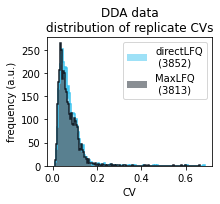

In [6]:
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.figure.set_size_inches(1.25*2.363,2.363)
#initialize ax object with specified size

lfqbenchmark.CVDistributionPlotter(list_of_dataset_cv_infos=[cvinfo_directlfq, cvinfo_maxlfq], ax = ax,cumulative=False, density=False, bins=150)
ax.legend()


ax.set_title("DDA data\ndistribution of replicate CVs")
ax.set_xlabel("CV")
ax.set_ylabel('frequency (a.u.)')
plt.savefig(outfile, bbox_inches='tight', dpi=300)
plt.savefig(outfile.replace(".pdf", ".png"), bbox_inches='tight', dpi=300)
